In [1]:
import urllib.request, json 

# 5min BTC/USDT chart form Poloniex since 2017-01-01T00:00:00+00:00 till 2018-10-14T20:00:00+00:00
with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1483228800&end=1539547200&period=300") as url:
    data = json.loads(url.read().decode())

In [2]:
print(data[0])

{'date': 1483228800, 'high': 965.00000066, 'low': 964.00000002, 'open': 965.00000055, 'close': 964.00000127, 'volume': 5398.83711674, 'quoteVolume': 5.59672254, 'weightedAverage': 964.64262399}


In [3]:
import csv
import numpy as np

with open("poloniex_usdt_btc_20170101_DOHLCV_300.csv", "w", newline='') as f:
    writer = csv.writer(f,delimiter=';')
    
    writer.writerow(['date', 'open', 'high', 'low', 'close', 'volume'])
    for line in data:
        writer.writerow([line['date'], line['open'], line['high'],line['low'], line['close'], line['volume']])

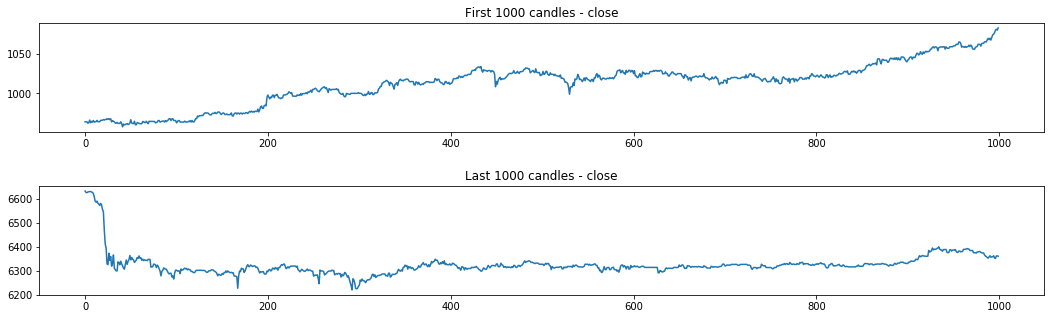

In [6]:
import matplotlib.pyplot as plt

data = np.genfromtxt('poloniex_usdt_btc_20170101_DOHLCV_300.csv', delimiter=';', skip_header=1)

# Visualizing chart with close prices
# These charts are ok
plt.figure(figsize=(18, 5))
plt.subplot(211).set_title('First 1000 candles - close')
plt.plot(data[:1000,4])
plt.subplot(212).set_title('Last 1000 candles - close')
plt.plot(data[-1000:,4])
plt.subplots_adjust(hspace=0.5)
plt.show()


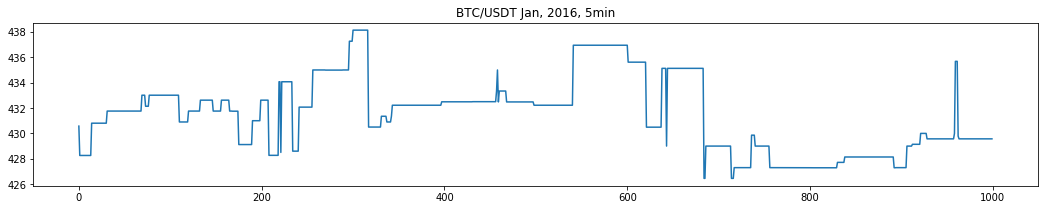

In [14]:
# Reason why we decided to use data from 2017:
# Chart from Jan, 2016 has flat parts because of low volume

# 5min BTC/USDT chart form Poloniex from Jan 01, 2016
with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1451606400&end=1454284800&period=300") as url:
    wrong_data = json.loads(url.read().decode())
    
wrong_close = []
for line in wrong_data:
    wrong_close.append(line['close'])

plt.figure(figsize=(18, 3))
plt.plot(wrong_close[:1000])
plt.title('BTC/USDT Jan 01, 2016, 5min')
plt.show()